# MLPRegressor

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import  metrics

# Zad.

Proszę narysować wykres dowolnej funkcji na odcinku $[0,3]$.

Będzie to model, który będziemy chcieli znaleźć.

In [2]:
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
x_tr = np.linspace(0, 3, 200)
y_tr = f(x_tr)
x = stats.uniform(0,3).rvs(100)
y = f(x) + stats.norm(0,0.2).rvs(len(x))

# Zadanie
Wykonaj regresję z różnymi parametrami.

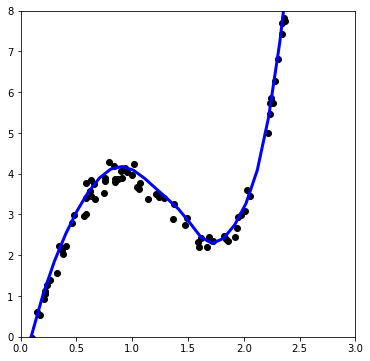

In [3]:
x=np.vstack(x)
x_plot = np.vstack(np.linspace(0, 10, 100))

MLP = MLPRegressor(hidden_layer_sizes=(100, 50, 10), activation='tanh', max_iter=50000, batch_size=20, learning_rate_init=0.001, learning_rate="adaptive", solver='adam')
y_rbf = MLP.fit(x,y)

# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
plt.plot(x_plot, MLP.predict(x_plot), color='blue',linewidth=3)
plt.show()

In [4]:
from sklearn import  metrics

metrics.r2_score(y, MLP.predict(x))

0.992347313149938

# Zad. 
Wykonaj walidecję krzyżową.

In [8]:
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
kfold = model_selection.KFold(n_splits=5)

grid = GridSearchCV(make_pipeline(MLPRegressor(hidden_layer_sizes=(100, 50, 10), activation='tanh', max_iter=50000, batch_size=20, learning_rate_init=0.001, learning_rate="adaptive", solver='adam')),
                    cv=kfold,param_grid={},refit=True)

df_adv = pd.read_csv('https://raw.githubusercontent.com/przem85/podstawy_sztucznej_inteligencji/main/Advertising.csv', index_col=0)

X = df_adv[['TV', 'radio','newspaper']]
y = df_adv['sales']
grid.fit(X,y)

print(metrics.r2_score(y_true= y, y_pred= grid.best_estimator_.predict(X)))

0.9819451660983287
